In [1]:
import json
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipj
from pathlib import Path
import time

Damping oscillations $(0<\gamma<\omega_0)$

In [20]:
current_dir = current_dir = Path.cwd()
config = {
    "dt": 0.001,
    "x0": np.radians(10),
    "v0": 0.0,
    "w": 5.0,
    "k": 0.1,
    "steps": 100000,
    "output_path_rk4": current_dir/"output/rk4.txt",
    "output_path_h": current_dir/"output/h.txt",
    "output_path_e": current_dir/"output/e.txt"
}

exe_path = current_dir / "simulator_nonlinear"
config_path = current_dir/ "config_damp.json"

config["output_path_rk4"] = str(config["output_path_rk4"])
config["output_path_h"] = str(config["output_path_h"])
config["output_path_e"] = str(config["output_path_e"])


print("exe_path:", exe_path)
print("config_path:", config_path)

with open(config_path, "w") as f:
    json.dump(config, f, indent=4)

subprocess.run([str(exe_path), str(config_path)], check=True)

exe_path: /workspaces/Physics-processes-modeling-3-sem/7w/Non-linear/simulator_nonlinear
config_path: /workspaces/Physics-processes-modeling-3-sem/7w/Non-linear/config_damp.json


CompletedProcess(args=['/workspaces/Physics-processes-modeling-3-sem/7w/Non-linear/simulator_nonlinear', '/workspaces/Physics-processes-modeling-3-sem/7w/Non-linear/config_damp.json'], returncode=0)

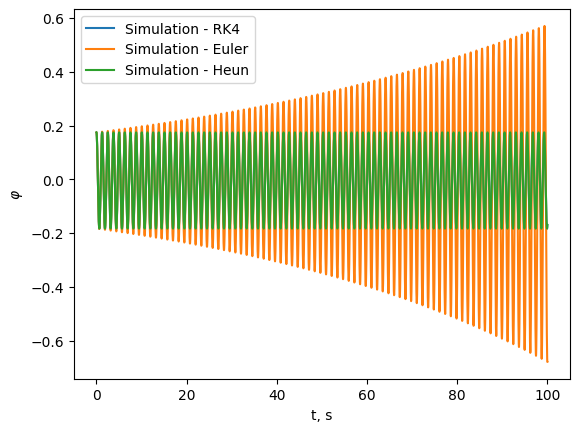

In [21]:
data_rk4 = np.loadtxt(config["output_path_rk4"])
data_h = np.loadtxt(config["output_path_h"])
data_e = np.loadtxt(config["output_path_e"])
w=config["w"]
k=config["k"]
t_rk4, x_rk4, v_rk4 = data_rk4[:, 0], data_rk4[:, 1], data_rk4[:, 2]
t_h, x_h, v_h = data_h[:, 0], data_h[:, 1], data_h[:, 2]
t_e, x_e, v_e = data_e[:, 0], data_e[:, 1], data_e[:, 2]

plt.plot(t_rk4, x_rk4, label="Simulation - RK4")
plt.plot(t_e, x_e, label="Simulation - Euler")
plt.plot(t_h, x_h, label="Simulation - Heun")

plt.xlabel("t, s")
plt.ylabel(r"$\varphi$")
plt.legend()
plt.show()

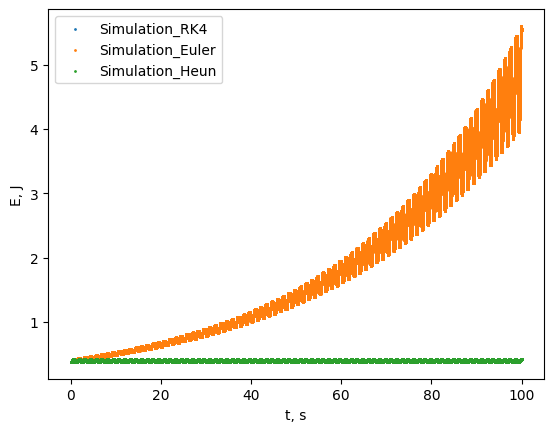

In [22]:
E_rk4=0.5 * v_rk4**2 + w**2 * (1 - np.cos(x_rk4))
plt.scatter(t_rk4, E_rk4, s=1, label="Simulation_RK4")

E_e=0.5 * v_e**2 + w**2 * (1 - np.cos(x_e))
plt.scatter(t_e, E_e, s=1, label="Simulation_Euler")

E_h=0.5 * v_h**2 + w**2 * (1 - np.cos(x_h))
plt.scatter(t_h, E_h, s=1, label="Simulation_Heun")

plt.xlabel("t, s")
plt.ylabel("E, J")
plt.legend()

Text(0.5, 1.0, 'Phase diagram')

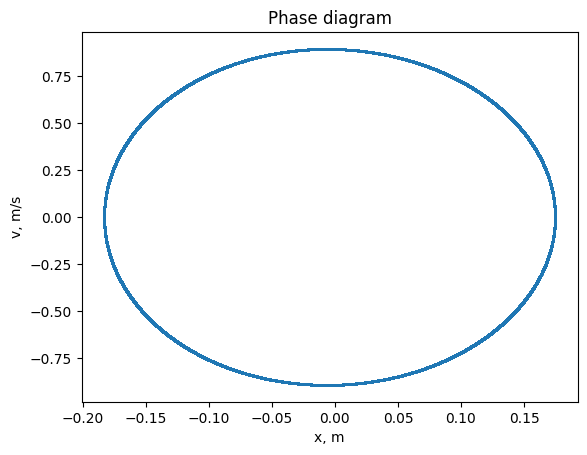

In [23]:
plt.scatter(x_rk4,v_rk4,s=1)
plt.xlabel("x, m")
plt.ylabel("v, m/s")
plt.title("Phase diagram")